<a href="https://colab.research.google.com/github/willianrocha/bootcamp-datascience-alura/blob/main/notebooks/COVID_19_What_happened_in_Manaus%3F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup and functions

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import date

In [2]:
%pip install isoweek
from isoweek import Week

In [153]:
GRAY1 = '#BFBEBE'
GRAY4 = '#646369'
GRAY5 = '#76787B'
MANAUS = "#35618f"
BELEM = "#458612"
first_wave = [date(2020,4,1), date(2020,6,20)]
first_wave = [3, 12]
plateau = [date(2020,6,20), date(2020,11,1)]
plateau = [12, 31]

In [4]:
# New
metropolitan_path = 'https://github.com/willianrocha/covid-19_vaccine/raw/main/files/mortality_metropolitan_manaus_belem.csv'
metropolitan_header = ['Region', 'State', 'Date', 'Population', 'Cumulative Cases', 'New Cases', 'Cumulative Deaths', 'New Deaths', 'Metropolitan area', 'Year', 'Week']
df_belem_manaus = pd.read_csv(metropolitan_path, names=metropolitan_header, skiprows=1)
df_belem_manaus['Date'] = df_belem_manaus['Date'].astype('datetime64')
df_belem_manaus['Week'] = df_belem_manaus['Week'].astype('datetime64')

In [5]:
mobility_path = 'https://github.com/willianrocha/covid-19_vaccine/raw/main/files/mobility_metropolitan_manaus_belem.csv'
mobility_header = ['Date', 'State', 'Municipality', 'Residential', 'Workplace', 'Transit Station', 'Parks', 'Grocery and Pharmacy', 'Retail and Recreation']

df_mobility = pd.read_csv(mobility_path, names=mobility_header, skiprows=1)
df_mobility['Date'] = df_mobility['Date'].astype('datetime64')
df_mobility[['Year', 'Week']]  = df_mobility["Date"].dt.isocalendar()[['year', 'week']]
df_mobility['Week'] = df_mobility.apply(lambda x: Week(x['Year'], x['Week']).monday().strftime("%d/%b/%Y"), axis=1).astype('datetime64')
df_mobility.drop(['Year'], axis=1, inplace=True)

In [62]:
def to_color(ax, fontsize: int, color: str):
  for i in ax.get_yticklabels() + ax.get_xticklabels():
    i.set_fontsize(12)
    i.set_color(GRAY5)

In [187]:
def first_wave_graph(df_belem_manaus, cut_date=True):
  df_man = df_belem_manaus.loc[df_belem_manaus['Metropolitan area'] == 'Grande Manaus'].groupby('Week').sum().reset_index().copy()
  if cut_date:
    df_man = df_man.loc[df_man['Week'] < '2020-12-01']
  df_man['Week'] = df_man['Week'].dt.strftime("%d/%b").astype(str)
  xticks_labels = [v for i, v in enumerate(df_man['Week'].unique().tolist()) if i%2 == 0]

  fig = plt.figure(figsize=(15,6))
  ax = df_man.plot(kind='line', y='New Deaths', figsize=(15,6), linewidth = 3, color=MANAUS)
  ax.set_xticklabels(xticks_labels, rotation=45)
  ax.set_xlabel("Weeks", fontsize = 14, color=GRAY5)
  ax.set_ylabel("# of deaths", fontsize = 14, color=GRAY5)
  to_color(ax, 12, GRAY5)
  # for i in ax.get_yticklabels() + ax.get_xticklabels():
  #   i.set_fontsize(12)
  #   i.set_color(GRAY5)
  ax.tick_params(color = GRAY5, bottom = 'off')
  ax.spines['bottom'].set_color(GRAY5)
  ax.spines['left'].set_color(GRAY5)
  ax.set_ylim(0,900)
  ax.set_xlim(0, 31)
  ax.get_legend().remove()
  ax.axvspan(first_wave[0], first_wave[1], alpha=0.2, color='red')
  sns.despine()

  plt.xticks(np.arange(0, 32, 2.0))
  plt.title('$\\bf{COVID-19\ Deaths\ in\ Greater\ Manaus\ area}$\nWeekly COVID-19 deaths from 2020/March until 2020/November',
          loc = 'left', fontsize = 22, color = GRAY4)
  plt.text(first_wave[0]+2.73, 800, 'First wave', fontsize = 20, color = GRAY5)
  plt.text(plateau[0]+1.73, 800, 'Plateau', fontsize = 20, color = GRAY5)
  plt.grid(color = 'lightgrey', linewidth = 0.5)
  plt.show()
  return df_man, ax, plt

In [158]:
def plateau_graph(df_mobility):
  header = ['Residential', 'Workplace', 'Transit Station', 'Parks', 'Grocery and Pharmacy', 'Retail and Recreation']
  df_mobility_manaus = df_mobility.query("State == 'Amazonas'").copy()
  df_mobility_manaus = df_mobility_manaus.loc[df_mobility_manaus['Date'] < '2020-11-01']#.astype(str)
  df_mobility_manaus = df_mobility_manaus.groupby(['Week', 'Municipality']).mean().reset_index()
  df_mobility_manaus['Week'] = df_mobility_manaus['Week'].dt.strftime("%d/%b").astype(str)
  xticks_labels = [v for i, v in enumerate(df_mobility_manaus['Week'].unique().tolist()) if i%2 == 0]
  xticks_length = len(df_mobility_manaus['Week'].unique())
  pallete = [GRAY1]*len(df_mobility_manaus['Municipality'].unique())
  pallete[3] = MANAUS

  fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20,14))
  pos = [[0,0],[0,1],[1,0],[1,1],[2,0],[2,1]]
  col = 0
  for r in range(len(pos)):
    subplot = axes[pos[r][0]][pos[r][1]]
    ax = sns.lineplot(data=df_mobility_manaus, x='Week', y=header[r], hue='Municipality', ax=subplot, palette=pallete)
    subplot.set_ylim(-100,150)
    subplot.set_xlim(0, len(df_mobility_manaus['Week'].unique())-1)
    subplot.set_xlabel('')
    # handles, labels = subplot.get_legend_handles_labels()
    subplot.get_legend().remove()
    subplot.set_ylabel(header[r], fontsize = 14, color=GRAY5)
    subplot.set_xticklabels(xticks_labels, rotation=45)
    ax.axvspan(9, 18, alpha=0.2, color='red')
    ax.tick_params(color = GRAY5, bottom = 'off')
    ax.spines['bottom'].set_color(GRAY5)
    ax.spines['left'].set_color(GRAY5)
    to_color(ax, 10, GRAY5)
  sns.despine()
  for ax in fig.axes:
      plt.sca(ax)
      plt.text(10+.73, 100, 'First wave', fontsize = 20, color = GRAY4)
      plt.text(19+.73, 100, 'Plateau', fontsize = 20, color = GRAY4)
      plt.xticks(rotation=45)
      plt.grid(color = 'lightgrey', linewidth = 0.5)
      plt.xticks(np.arange(0, xticks_length, 2.0))

  plt.suptitle('$\\bf{Mobility\ Report\ Comunity\ from\ Google\ for\ Greater\ Manaus\ Area}$\nMobility changes based on reference',
          fontsize = 22, color = GRAY4, y=fig.subplotpars.top+0.055, x=fig.subplotpars.left, ha='left')
  plt.subplots_adjust(wspace=0.1, hspace=0.25)	
  # plt.figlegend(handles, labels, title='Municipality', loc='center right')
  plt.show()
  return df_mobility_manaus

In [185]:
def second_wave_graph(df_belem_manaus):
  df_man = df_belem_manaus.loc[df_belem_manaus['Metropolitan area'] == 'Grande Manaus'].groupby('Week').sum().reset_index().copy()
  df_man['Week'] = df_man['Week'].dt.strftime("%d/%b").astype(str)
  xticks_labels = [v for i, v in enumerate(df_man['Week'].unique().tolist()) if i%2 == 0]
  xticks_length = len(df_man['Week'].unique())

  ax = df_man.plot(kind='line', y='New Deaths', figsize=(18,6), linewidth = 3, color=MANAUS)
  ax.set_xticklabels(xticks_labels, rotation=45)
  ax.set_xlabel("Weeks", fontsize = 14, color=GRAY5)
  ax.set_ylabel("# of deaths", fontsize = 14, color=GRAY5)
  to_color(ax, 12, GRAY5)
  ax.tick_params(color = GRAY5, bottom = 'off')
  ax.spines['bottom'].set_color(GRAY5)
  ax.spines['left'].set_color(GRAY5)
  ax.set_ylim(0,900)
  ax.set_xlim(0, 63)
  ax.axvspan(first_wave[0], first_wave[1], alpha=0.2, color='red')
  ax.axvspan(41, 50, alpha=0.4, color='red')
  ax.get_legend().remove()
  sns.despine()
  
  plt.xticks(np.arange(0, xticks_length, 2.0))
  # plt.suptitle('COVID-19 Deaths in Greater Manaus area', fontsize = 16, ha='right', x=fig.subplotpars.right)
  # plt.title('Weekly COVID-19 deaths from 2020/March until 2021/May', fontsize = 14, loc="right")
  plt.title('$\\bf{COVID-19\ Deaths\ in\ Greater\ Manaus\ Area}$\nWeekly COVID-19 deaths from 2020/March until 2021/May',
            loc = 'left', fontsize = 22, color = GRAY4)
  plt.text(first_wave[0]+1.73, 800, 'First wave', fontsize = 20, color = GRAY4)
  plt.text(plateau[0]+1.73, 800, 'Plateau', fontsize = 20, color = GRAY4)
  plt.text(41+0.4, 100, 'Second wave', fontsize = 20, color = GRAY4)
  plt.grid(color = 'lightgrey', linewidth = 0.5)  
  plt.show()
  return df_man

COVID-19 has stricken the whole world hard! While many Brazilians who watched baffled what happened in Italy. As military trucks full of dead bodies crossed cities, and many more reports of deceased loved ones laying in bed for days waiting for government help. Meanwhile, little to no action was done to prepare Brazil for the upcoming crisis.

# What happened in Manaus?

<figure>
  <img src="https://github.com/willianrocha/covid-19_vaccine/raw/main/img/covid19_foroarea.jpeg" alt="Arial image of mass graves in Manaus, Brazil" class="bg-primary mb-1" width="900px">
  <figcaption>21/04/20 - 19h20: Mass graves were opened in Manaus' public graveyard for COVID-19 victims. Foto: Sandro Pereira / Fotoarena / Folhapress. Fonte: Jornal O Tempo: <a href="https://www.otempo.com.br/coronavirus/coronavirus-manaus-comeca-a-enterrar-vitimas-da-covid-19-em-valas-comuns-1.2327477">link<a/></figcaption>
</figure>

The first major city in Brazil to fall into COVID-19 catastrophe was Manaus. Amid the world rush to gain access to masks, develop test methods and implement tracking methotologies, Manaus had nothing.

So, with historically poor medical infrastructure, Manaus fell under the pressure of COVID-19, leaving hundreds of people to die in their homes without medical attention. With not enough testing, the government had almost no tools to track the current situation besides wait for people to seek help. Manaus, until today (June 9th), has lost 10 thousand, while Belém, another major city with similar characteristics, has lost only 6 thousand.


### Where is Manaus?

<figure>
  <img src="https://github.com/willianrocha/covid-19_vaccine/raw/main/img/manaus_aerea_porto.jpg" alt="Arial image of mass graves in Manaus, Brazil" class="bg-primary mb-1" width="900px">
  <figcaption>Aerial images of Manaus</figcaption>
</figure>

Manaus is one of the biggest cities in Brazil, with 2.5 million people in its greater region, Greater Manaus. Manaus is located in the Nothern region of Brazil, in the middle of the Amazon Rain forest. To access Manaus, it can only be done using the airport or by boat. By air, it is 4 hours flight from São Paulo, by the river, it takes 5 days going up the Amazon River from Belém.
The Greater Manaus area is 127,287,789 km^2. It is the biggest in Brazil, superior to some Brazilian states, like Rio de Janeiro (being twice the size) [[1]](https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Manaus#Geografia).

## Okay, how it happened?

With historically poor medical infrastructure, Contact Tracing was poorly implemented and the covid spread rapidly. In conjunction with that, testing material and methodologies still under development in the world.
The official death toll was 332 until 30 April, meanwhile, between 21 and 28 April there were 262 deaths for unknown reasons[[2]](https://g1.globo.com/am/amazonas/noticia/2020/04/30/com-subnotificacao-de-casos-em-manaus-numero-de-mortes-por-covid-19-pode-ser-ate-sete-vezes-maior.ghtml). While many countries had implemented measures to track COVID-19 contact, Manaus strategy was to wait for then in hospitals.
```
df_regiao_metropolitana_manaus.loc[df_regiao_metropolitana_manaus['Data'] < '2020-04-30'].sum()
```

## First Wave

This strategy paid off (wtf). In "João Lúcio Pereira Machado" State Hospital, patient companions were sleeping under patient beds, intensive care units were fully occupied by COVID-19 cases. 7 ICU beds could have been in use, but they were out of work due to the lack of complementary equipment[[3]](https://g1.globo.com/jornal-nacional/noticia/2020/05/01/colapso-no-sistema-de-saude-em-manaus-faz-acompanhantes-dormirem-em-chao-de-hospital.ghtml). News like that could been seen every day.
From the graph bellow, the first spike in death cases. Please, bear in mind the chronicle lack of notification.

Two weeks before the first wave, President of Brazil, Jair Bolsonaro, made a speech regarding, diminushing the virus impact [[4]](https://www.youtube.com/watch?v=Vl_DYb-XaAE).

<Figure size 1080x432 with 0 Axes>

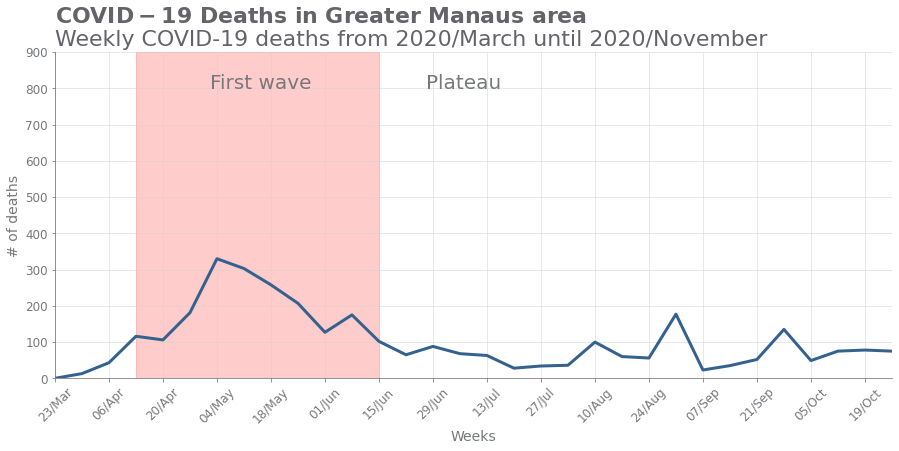

In [189]:
_ = first_wave_graph(df_belem_manaus)

## Plateau

After the first wave, it was estimated that 70% of the population of Manaus (capital of the Amazonas State) had been infected with SARS-CoV-2 \[5].

> Socioeconomic factors may have been the cause of this extensive transmission in the region. Theoretically, this percentage of the infected population could provide protection mediated by herd immunity. In fact, although there has been relaxation of individual protective measures and social distancing, hospitalizations due to COVID-19 remained stable and lower between May and November 2020 in Manaus \[6].

Based on Google Mobility Report\[7], it is possible to see that after Jul 27th, the change in behavior as the COVID-19 ease in the city. From Jul 27th onwards, the levels of outside activities are higher than before the pandemic. This data suggests the loosen control on social distancing measures. The others grey lines are municipalities that are in Grater Manaus Area.

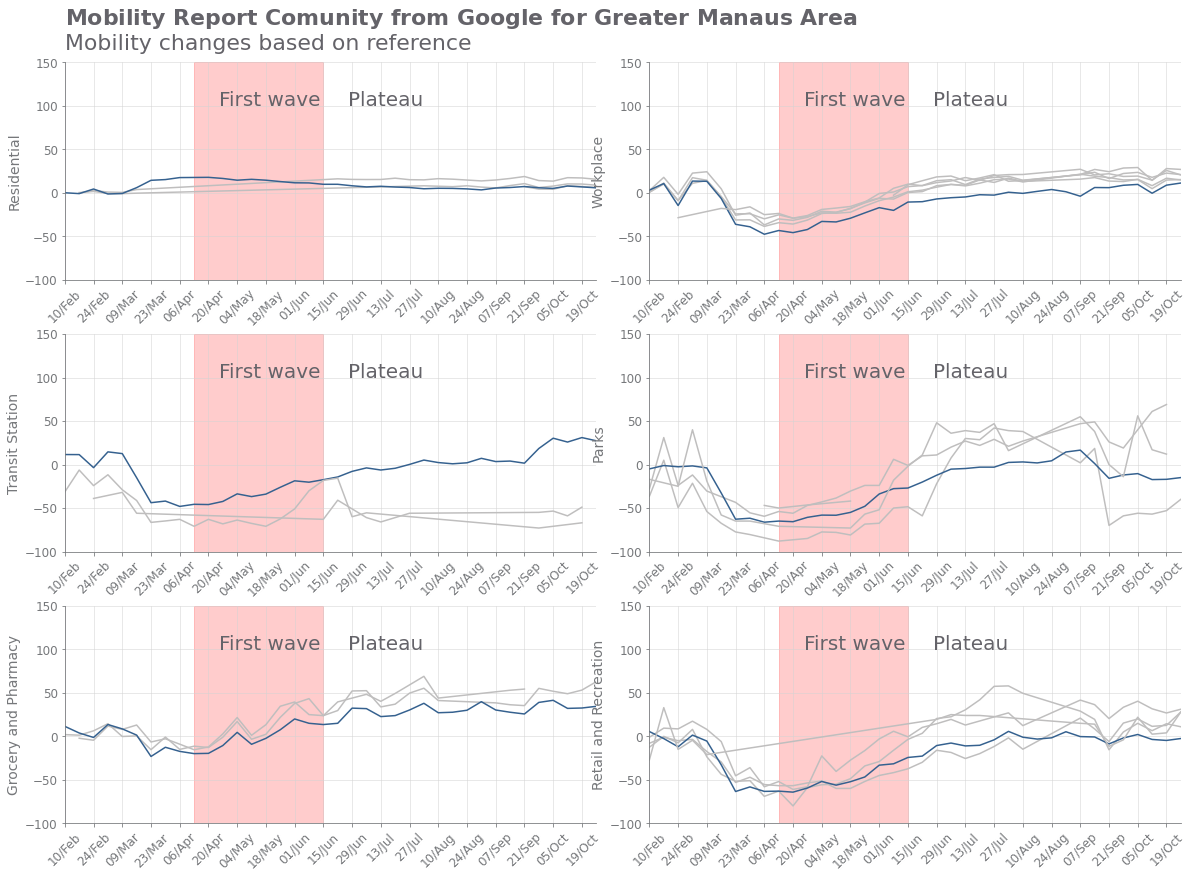

In [159]:
d = plateau_graph(df_mobility)

## Second Wave

After the 6 months of low COVID-19 casualties, life goes to normal. Restaurants working with relaxed distance measures, patios working almost normally. Pub owners have organized to demand reopening[[8]](https://amazonasatual.com.br/empresarios-entram-na-justica-para-reabrir-bares-e-restaurantes-em-manaus/) arguing that not even elections have increased dramatically COVID cases. At Holiday Eves, government authorities tried to close the commerce and restaurant as COVID cases were increasing slowly but steadily through December. This decision was met with protests[[9]](https://g1.globo.com/am/amazonas/noticia/2020/12/26/multidao-faz-protesto-no-centro-de-manaus-contra-novo-fechamento-do-comercio-video.ghtml).

<figure>
  <img src="https://github.com/willianrocha/covid-19_vaccine/raw/main/img/covid19_crowdagainstclosings.jpeg" alt="Protesters in Manaus, Brazil" class="bg-primary mb-1" width="900px">
  <figcaption>26/12/2020 11h02: Multidão protesto contra fechamento do comércio em Manaus. — Foto: Paulo Paixão/Rede Amazônica Fonte: G1: <a href="https://g1.globo.com/am/amazonas/noticia/2020/12/26/multidao-faz-protesto-no-centro-de-manaus-contra-novo-fechamento-do-comercio-video.ghtml">link<a/></figcaption>
</figure>

After 1 week of new Year's eve, the COVID cases skyrocketed. This time, a new variant was formed (Gamma variant), and it was evading the supposed immunity herd caused by the first wave\[10]. As the Manaus population has relaxed about COVID and got back to normal, this was the perfect environment for COVID-19 reinfections.

This Gamma variant, requires more support, thus increasing time in hospitals. This spike created stress in oxygen supply, effectively depleting oxygen supply in Manaus[[10]](https://www.bbc.com/portuguese/brasil-55680257). The transport of oxygen cylinder is highly complicated since it is explosive, so special air carriers have to be used. 

In graph bellow, the first week of 2021 had numbers as high that the peak of first wave. This second wave extended from January 4th to March 8th. In this meantime, the oxygen supply was releived by artists on January 16th, not by the goverment, like Gusttavo Lima[[11]](https://www.cnnbrasil.com.br/entretenimento/2021/01/16/cantor-gusttavo-lima-envia-cilindros-de-oxigenio-para-manaus). And latter, supply was restablished.

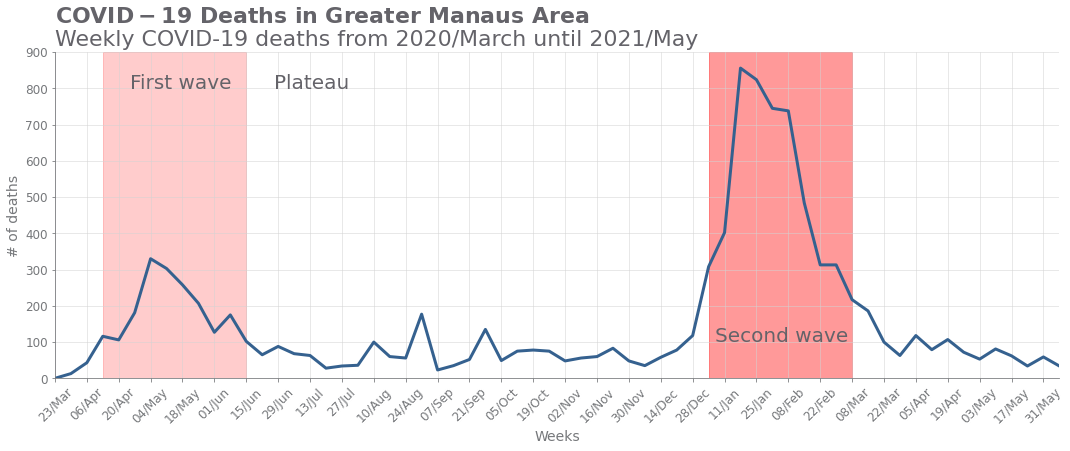

In [186]:
df = second_wave_graph(df_belem_manaus)

# Conclusion

The only way to fight COVID-19 is to focus on measures to keep social distance while the vaccination gains momentum. Manaus had the immunity herd through death, and it only gained the opportunity to feel it again. Stay at home, and wait for your time to take the vaccine.

# References

\[1] - https://pt.wikipedia.org/wiki/Regi%C3%A3o_Metropolitana_de_Manaus#Geografia

\[2] https://g1.globo.com/am/amazonas/noticia/2020/04/30/com-subnotificacao-de-casos-em-manaus-numero-de-mortes-por-covid-19-pode-ser-ate-sete-vezes-maior.ghtml

\[3] https://g1.globo.com/jornal-nacional/noticia/2020/05/01/colapso-no-sistema-de-saude-em-manaus-faz-acompanhantes-dormirem-em-chao-de-hospital.ghtml

\[4] https://www.youtube.com/watch?v=Vl_DYb-XaAE

\[5] - Buss LF, Prete CA, Abrahim CMM, Mendrone A, Salomon T, de Almeida-Neto C, et al. Three-quarters attack rate of SARS-CoV-2 in the Brazilian Amazon during a largely unmitigated epidemic. Science. 2021;371(6526):288–92.

\[6] - de Souza, F.S.H., Hojo-Souza, N.S., da Silva, C.M. et al. Second wave of COVID-19 in Brazil: younger at higher risk. Eur J Epidemiol 36, 441–443 (2021). https://doi.org/10.1007/s10654-021-00750-8

\[7] - Google LLC "Google COVID-19 Community Mobility Reports".
https://www.google.com/covid19/mobility/ Accessed: 06/09/2021.

\[8] https://amazonasatual.com.br/empresarios-entram-na-justica-para-reabrir-bares-e-restaurantes-em-manaus/

\[9] https://g1.globo.com/am/amazonas/noticia/2020/12/26/multidao-faz-protesto-no-centro-de-manaus-contra-novo-fechamento-do-comercio-video.ghtml

\[10] - Naveca, F.G., Nascimento, V., de Souza, V.C. et al. COVID-19 in Amazonas, Brazil, was driven by the persistence of endemic lineages and P.1 emergence. Nat Med (2021). https://doi.org/10.1038/s41591-021-01378-7